# Plotting the success rate vs Grid Sizes
data from - https://docs.google.com/spreadsheets/d/1odjwT27vLuyLV7_cNA9C_xvxafYnPSb8KwxT_YEUjgA/edit?gid=1452197898#gid=1452197898

In [1]:
model = ["a", "b"]
input_type = ["language", "ascii"]
sucess_rates = [[1, 2, 3], [4, 5, 6]]
EMs = [[[1, 2, 3], [4, 5, 6]]]
grid_sizes = [3, 4, 5, 6, 7]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_success_rates(grid_sizes, input_types, success_rates, models=None, title='Success Rate vs Grid Size'):
    """
    Plots success rates against grid sizes with data point values displayed.
    
    Parameters:
    grid_sizes (list): List of grid sizes (x-axis values)
    input_types (list): List of input type names (e.g., ['language', 'ascii'])
    success_rates (list): Success rate data. Structure depends on models parameter:
        - Single model: 2D list [input_type][grid_size]
        - Multi-model: 3D list [model][input_type][grid_size]
    models (list, optional): List of model names for multi-model plots
    title (str, optional): Plot title
    """
    fig, ax = plt.subplots(figsize=(12, 7))  # Slightly larger figure
    
    # Validate input dimensions
    if models:
        assert len(success_rates) == len(models), "Models count mismatch"
        assert all(len(sub) == len(input_types) for sub in success_rates), "Input types count mismatch"
    else:
        assert len(success_rates) == len(input_types), "Input types count mismatch"
    
    # Set up color and line style mappings
    colors = ["blue", "black"]  # Distinct colors for input types
    line_styles = ['-', '--', '-.', ':']  # Different line styles for models
    markers = ['o', 's', 'D', '^']  # Different markers for models
    text_color = "green"
    # Plotting logic
    if models:
        # Multi-model plot
        for model_idx, model_name in enumerate(models):
            for input_idx, input_name in enumerate(input_types):
                # Get current plotting style
                linestyle = line_styles[input_idx]
                marker = markers[input_idx]
                y_values = success_rates[model_idx][input_idx]
                
                # Plot the line
                ax.plot(
                    grid_sizes,
                    y_values,
                    color=colors[model_idx],
                    linestyle=linestyle,
                    linewidth=2,
                    markersize=8,
                    label=f'{model_name} ({input_name})'
                )
                
                # Add data labels
                for x, y in zip(grid_sizes, y_values):
                    ax.text(
                        x, y, f'{y}',
                        color=text_color,
                        fontsize=9,
                        ha='center',
                        va='bottom' if y < max(y_values) else 'top',
                    )
    else:
        # Single model plot
        for input_idx, input_name in enumerate(input_types):
            y_values = success_rates[input_idx]
            
            # Plot the line
            ax.plot(
                grid_sizes,
                y_values,
                color=colors[input_idx],
                linewidth=2,
                markersize=8,
                label=input_name
            )
            
            # Add data labels
            for x, y in zip(grid_sizes, y_values):
                ax.text(
                    x, y-2, f'{y}',
                    color=text_color,
                    fontsize=9,
                    ha='center',
                    va='bottom' if y < max(y_values) else 'top'
                )
    
    # Add plot decorations
    ax.set_xlabel('Grid Size', fontsize=12)
    ax.set_ylabel('Success Rate(%)', fontsize=12)
    ax.set_title(title, fontsize=14)
    
    # Improved legend placement
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15),
        ncol=2 if models else len(input_types),
        fontsize=10,
        framealpha=0.9
    )
    
    ax.grid(True, alpha=0.3)
    ax.set_xticks(grid_sizes)
    ax.set_xticklabels(grid_sizes)
    
    # Adjust y-axis limits to accommodate labels
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.05*(y_max-y_min), y_max + 0.1*(y_max-y_min))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Make room for the legend
    return fig, ax

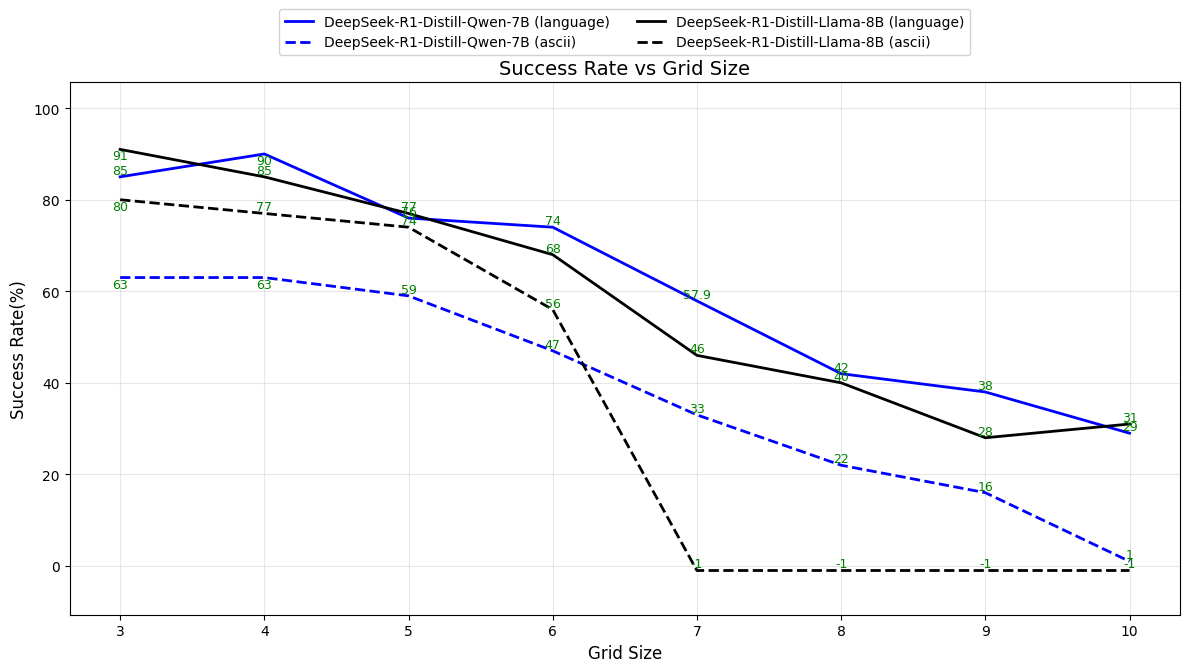

In [7]:
#### Sample data
grid_sizes = [3, 4, 5, 6, 7, 8, 9, 10]
input_types = ["language", "ascii"]
models = ["DeepSeek-R1-Distill-Qwen-7B", "DeepSeek-R1-Distill-Llama-8B"]

# 3D success rates [model][input_type][grid_size]
success_rates = [
    # DeepSeek-R1-Distill-Qwen-7B
    [
        [85, 90, 76, 74, 57.9, 42, 38, 29],  # Language
        [63, 63, 59, 47, 33, 22, 16, 1]   # ASCII
    ],
    # DeepSeek-R1-Distill-Llama-8B
    [
        [91, 85, 77, 68, 46, 40, 28, 31],  # Language
        [80, 77, 74, 56, -1, -1, -1, -1]# ASCII
    ]
]

# Generate plot
plot_success_rates(grid_sizes, input_types, success_rates, models=models)
plt.show()